In [1]:
train <- read.csv("train.csv")
features <- read.csv("features.csv")
stores <- read.csv("stores.csv")
test <- read.csv("test.csv")
library(ggplot2)
library(forecast)

In [13]:
#Store 1 and Dept 1
df = train[which(train$Store == 1 & train$Dept == 1),]

In [14]:
#Since traditional Forecasting methodologies are univariate
dt = subset(df, select = c("Date", "Weekly_Sales"))
#using the first two years to train the model and predict the third year
dt$SN = c(1:143)
#dt = dt[which(dt$SN < 101),]
dt = subset(dt, select = -SN)

In [15]:
dt$Date <- as.Date(dt$Date)
tail(dt)

,Date,Weekly_Sales
138,2012-09-21,19251.50
139,2012-09-28,18947.81
140,2012-10-05,21904.47
141,2012-10-12,22764.01
142,2012-10-19,24185.27
143,2012-10-26,27390.81


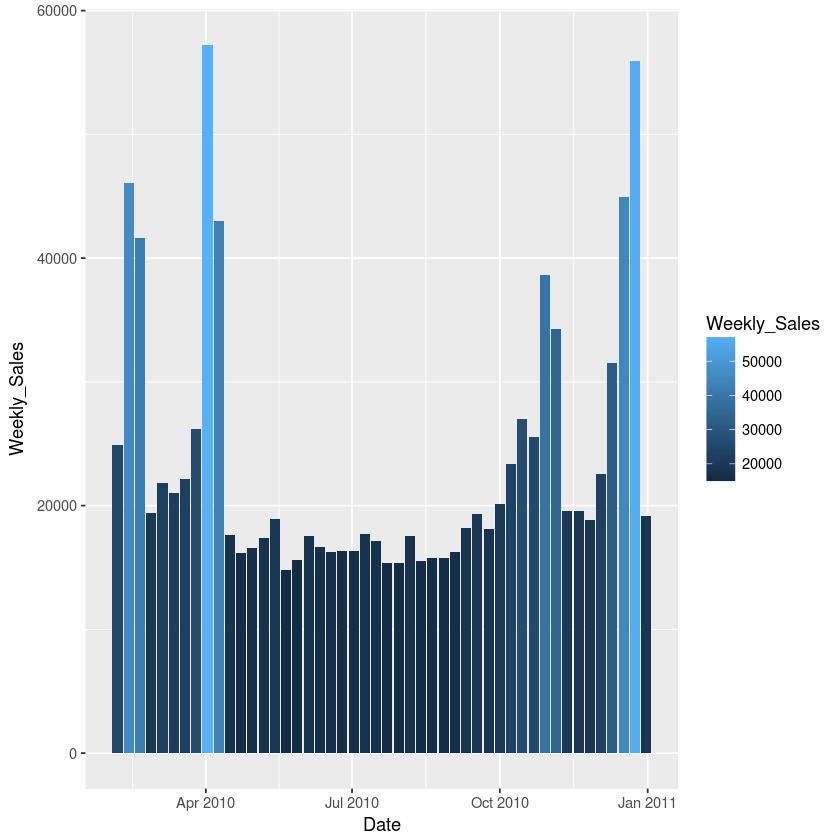

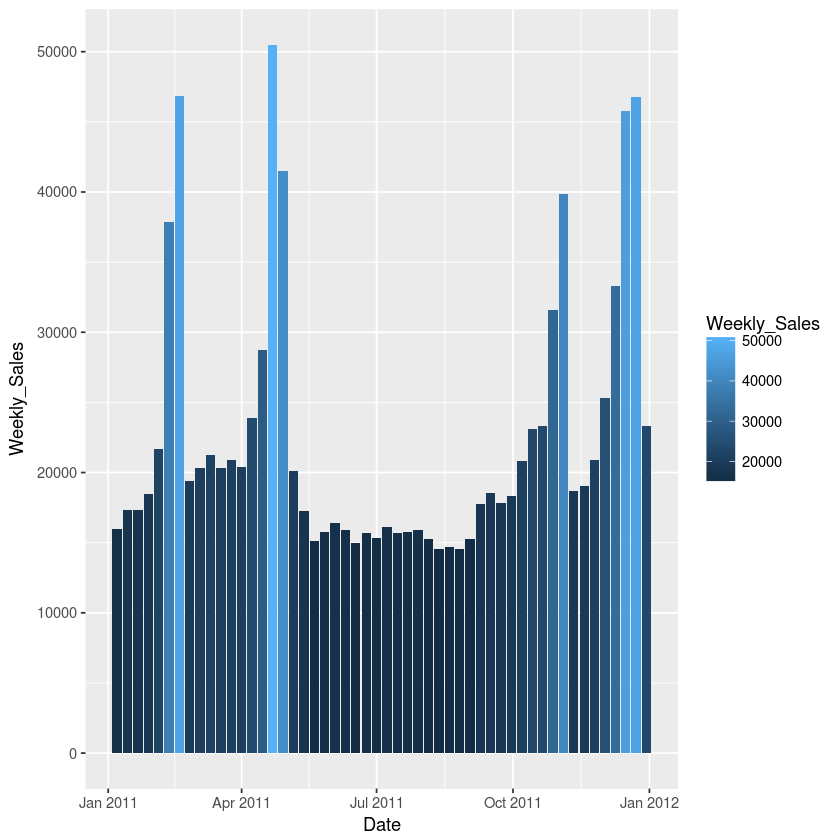

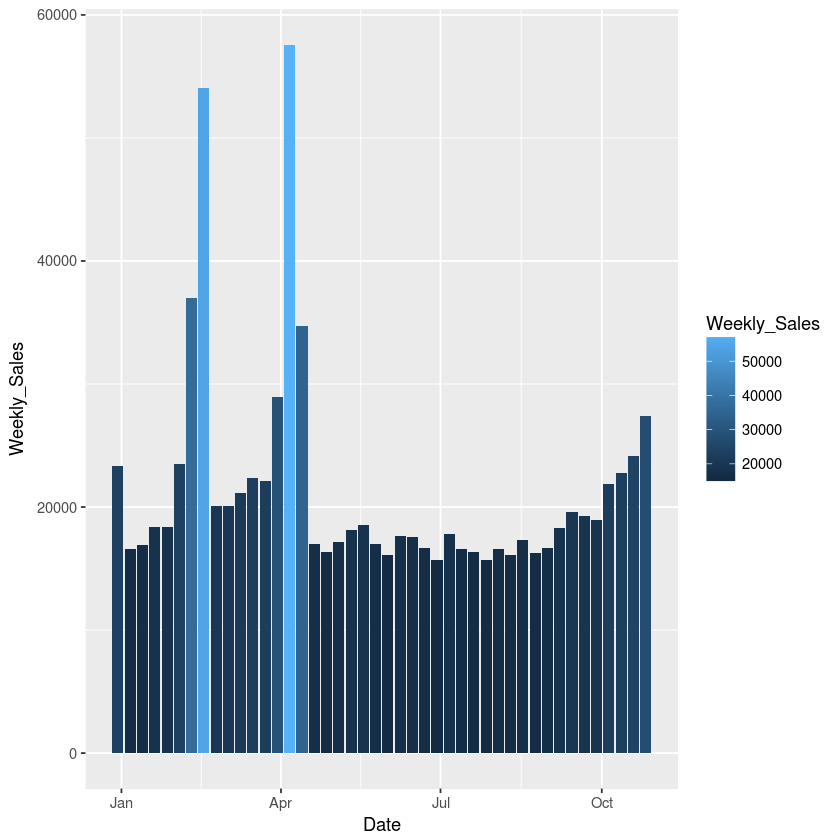

In [17]:
ggplot(data = dt[1:48,], aes(x=Date, y=Weekly_Sales, fill=Weekly_Sales)) + geom_bar(stat="identity")
ggplot(data = dt[49:100,], aes(x=Date, y=Weekly_Sales, fill=Weekly_Sales)) + geom_bar(stat="identity")
ggplot(data = dt[100:143,], aes(x=Date, y=Weekly_Sales, fill=Weekly_Sales)) + geom_bar(stat="identity")

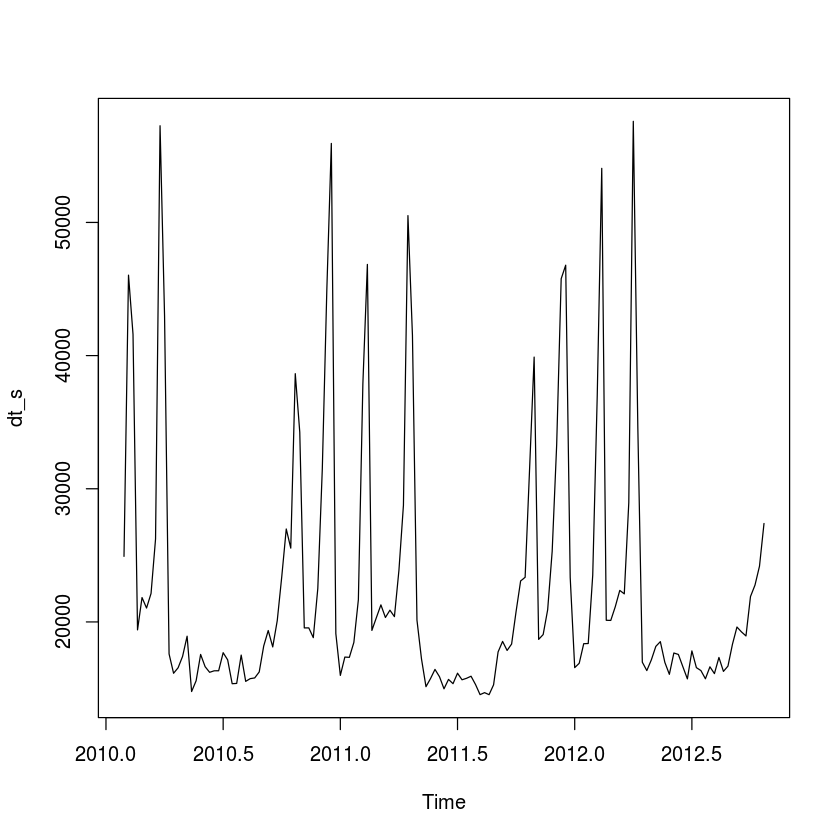

In [18]:
# rownames(dt) <- dt$Date
# dt <- subset(dt,select = -Date)
# tail(dt)
dt_s = ts(dt$Weekly_Sales, frequency = 52, start = c(2010, 5))
plot(dt_s)

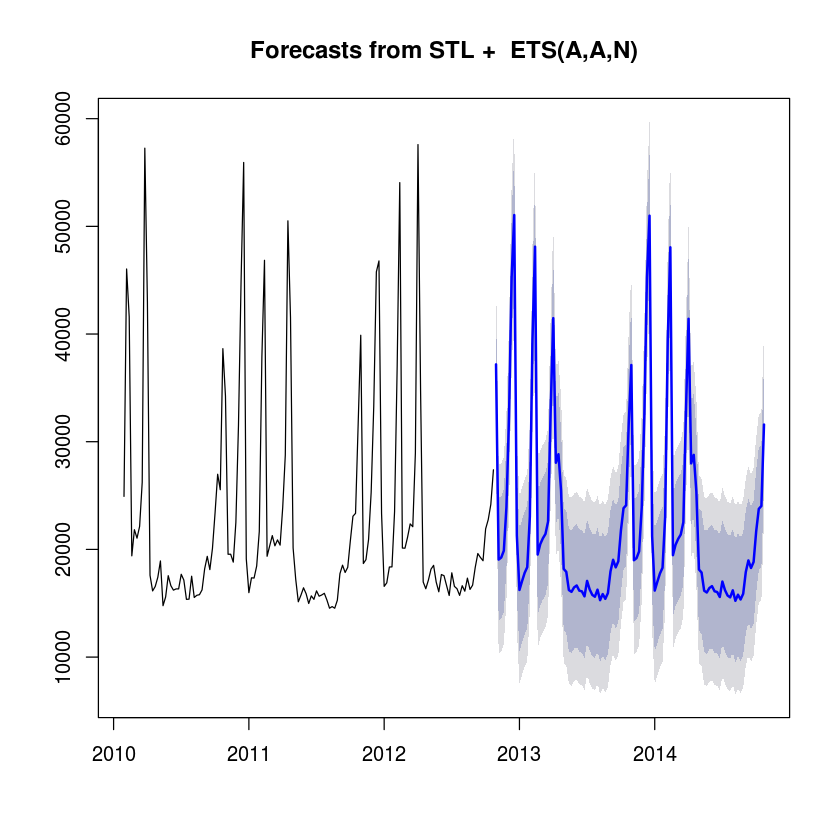

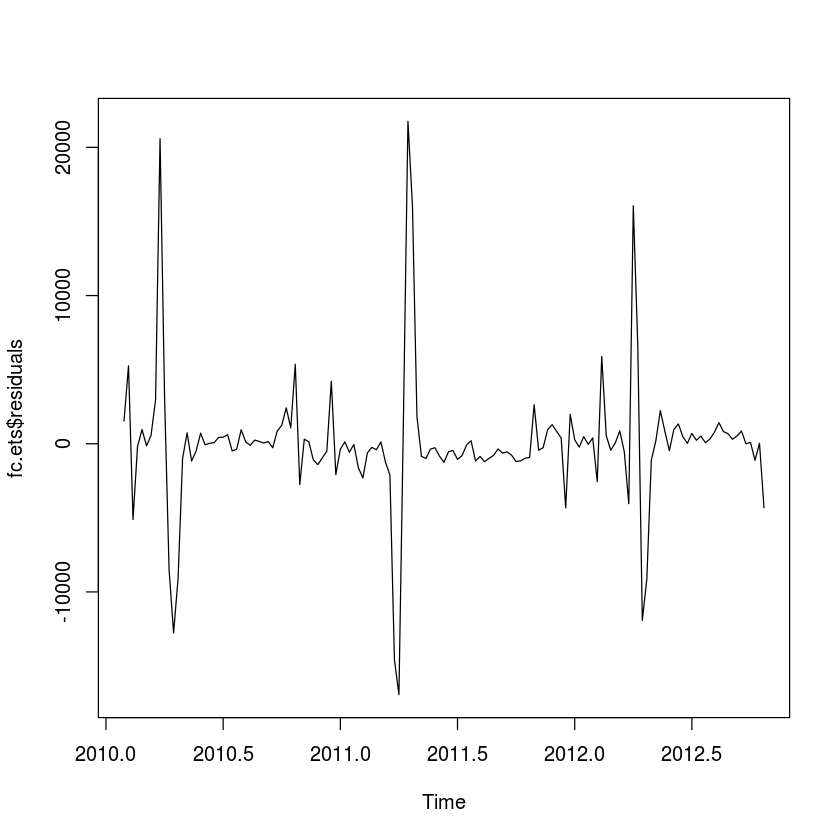

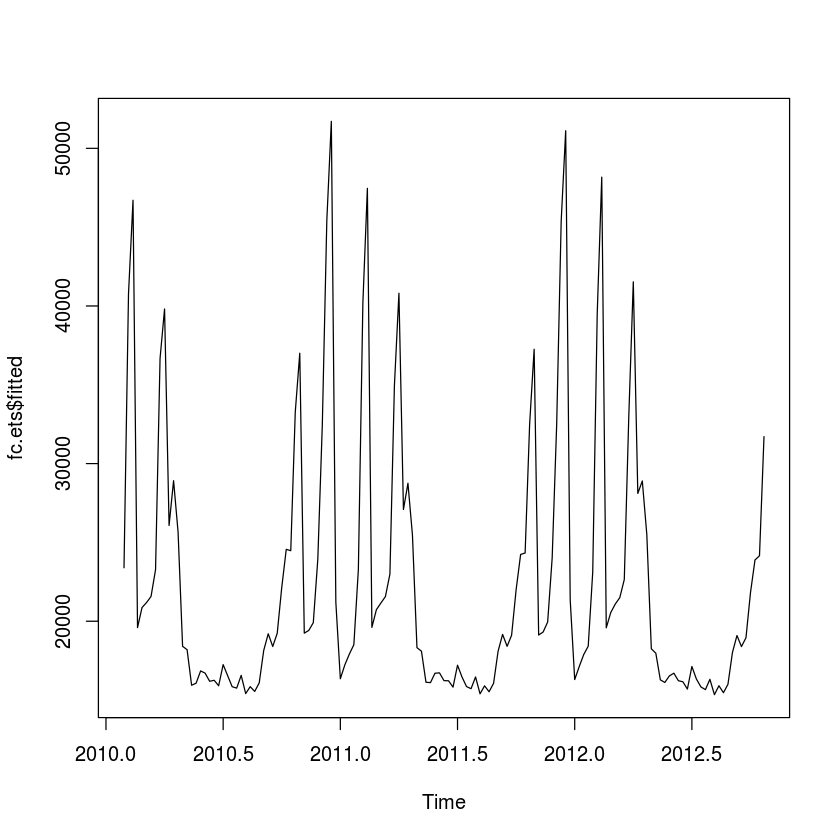

In [19]:
#ETS
fc.ets = forecast(dt_s)
plot(fc.ets)
plot(fc.ets$residuals)
plot(fc.ets$fitted)

Series: dt_s 
ARIMA(0,0,1)(0,1,0)[52]                    

Coefficients:
         ma1
      0.6695
s.e.  0.0719

sigma^2 estimated as 52502546:  log likelihood=-937.74
AIC=1879.49   AICc=1879.62   BIC=1884.51

         Point Forecast       Lo 80    Hi 80       Lo 95    Hi 95
2012.827       36424.86 27138.91131 45710.81 22223.22712 50626.49
2012.846       18689.54  7514.63194 29864.45  1598.99296 35780.09
2012.865       19050.66  7875.75194 30225.57  1960.11296 36141.21
2012.885       20911.25  9736.34194 32086.16  3820.70296 38001.80
2012.904       25293.49 14118.58194 36468.40  8202.94296 42384.04
2012.923       33305.92 22131.01194 44480.83 16215.37296 50396.47
2012.942       45773.03 34598.12194 56947.94 28682.48296 62863.58
2012.962       46788.75 35613.84194 57963.66 29698.20296 63879.30
2012.981       23350.88 12175.97194 34525.79  6260.33296 40441.43
2013.000       16567.69  5392.78194 27742.60  -522.85704 33658.24
2013.019       16894.40  5719.49194 28069.31  -196.14704 33984.95
2013.038       18365.10  7190.19194 29540.01  1274.55296 35455.65
2013.058       18378.16  7203.25194 29553.07  1287.61296 35468.71
2013.077       23510.49 12335.58194 34685.40  6419.94296 40601.04
2013.096  

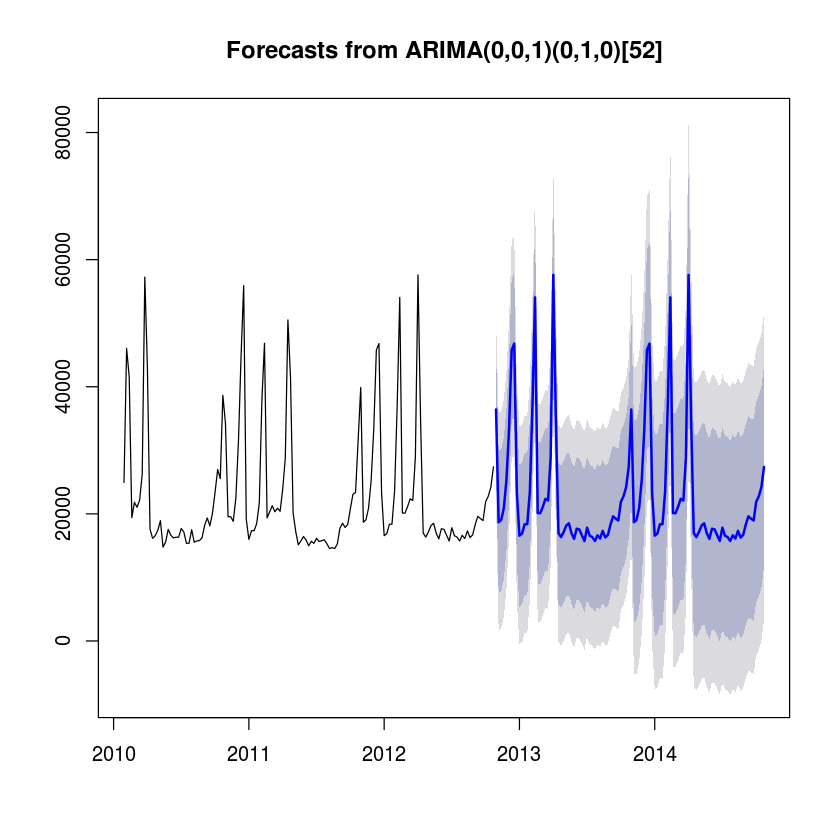

In [20]:
#ARIMA
ar = auto.arima(dt_s)
ar
fc.arima = forecast(ar)
fc.arima
plot(fc.arima)

In [21]:
accuracy(fc.ets)
accuracy(fc.arima)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.6934433,4440.788,2093.015,-2.239212,8.207728,0.5022576,0.373988


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-8.655693,5748.353,2431.66,-1.819204,9.799426,0.5835216,0.05599928


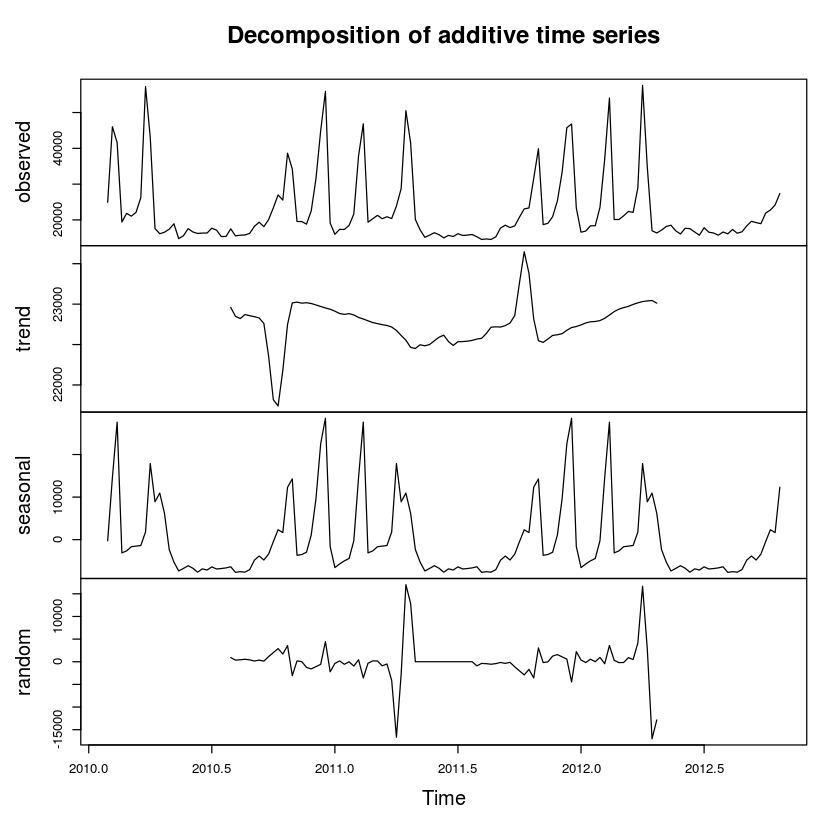

In [22]:
#Decompose the data into seasonal, trend and random
dt_dec <- decompose(dt_s)
plot(dt_dec)

In [23]:
#Deseasonalize data
dt_des = dt_s - dt_dec$seasonal
tail (dt_des)

Time Series:
Start = c(2012, 38) 
End = c(2012, 43) 
Frequency = 52 
[1] 24027.38 22342.77 22356.82 20433.71 22521.64 15067.18

In [24]:
#Simple Exponential Smoothing
f_SES = HoltWinters(dt_des, beta = FALSE, gamma = FALSE, l.start = dt[1,2])
f_SES

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = dt_des, beta = FALSE, gamma = FALSE, l.start = dt[1,     2])

Smoothing parameters:
 alpha: 0.02645289
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 22763.58

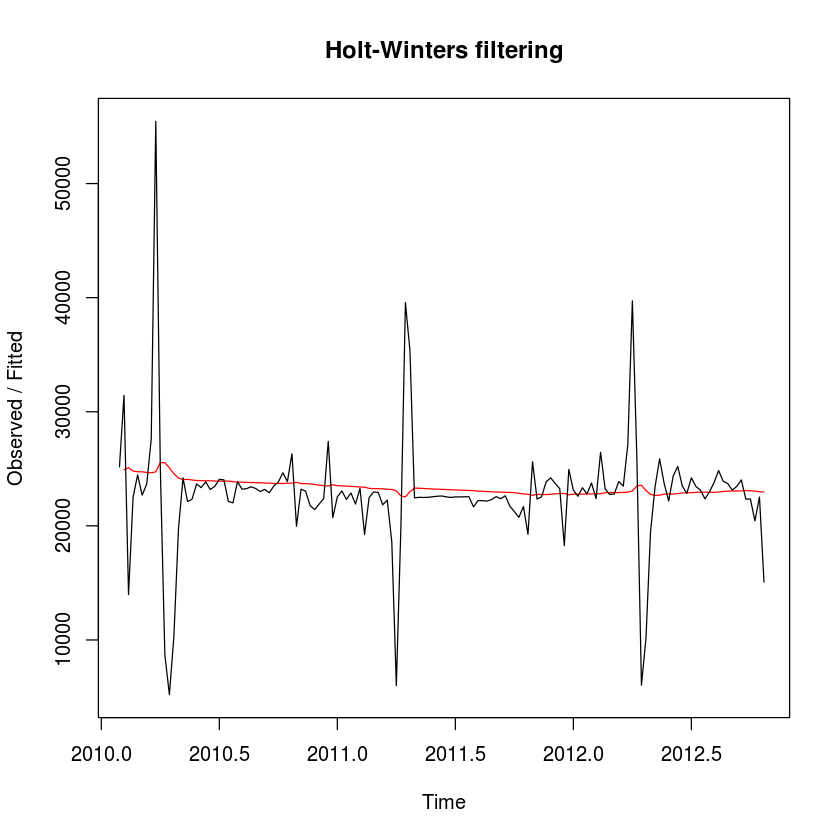

In [25]:
plot(f_SES)